In [25]:
# import zipfile
import xarray as xr

# import io
# import re
import numpy as np

from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [26]:
path = r"..\data\raw\RSS_WindSat_TB_L1C_r72424_20161231T223354_2016366_V08.0.nc4"

ds = xr.open_dataset(
    path, engine="h5netcdf", decode_times=False, decode_coords="coordinates"
)
ds

<xarray.Dataset> Size: 2GB
Dimensions:                (ydim_grid: 1440, xdim_grid: 3120, look: 2,
                            frequency_band: 5, polarization_6: 6,
                            polarization_2: 2)
Dimensions without coordinates: ydim_grid, xdim_grid, look, frequency_band,
                                polarization_6, polarization_2
Data variables: (12/17)
    earth_incidence_angle  (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    scan_angle             (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    tb_10                  (polarization_6, look, ydim_grid, xdim_grid) float32 216MB ...
    earth_azimuth_angle    (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    fractional_orbit       (xdim_grid) float64 25kB ...
    fra                    (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    ...                     ...
    pra                    (ydim_grid, xdim_grid, look, frequency_band) float32 180MB ...
    tb_37                  (polarization_6, look, ydim_grid, xdim_grid) float32 216MB ...
    tb_06                  (polarization_2, look, ydim_grid, xdim_grid) float32 72MB ...
    quality_flag           (ydim_grid, xdim_grid, look, frequency_band) int8 45MB ...
    land_fraction_06       (ydim_grid, xdim_grid) float32 18MB ...
    land_fraction_10       (ydim_grid, xdim_grid) float32 18MB ...
Attributes: (12/76)
    Conventions:                                 CF-1.7
    title:                                       RSS WindSat TOA Brightness T...
    version:                                     V08.0
    summary:                                     The dataset contains the Lev...
    references:                                   [1] T. Meissner and F. Went...
    acknowledgement:                             Funded under NASA Grant 80NS...
    ...                                          ...
    build_dmrpp_metadata.build_dmrpp:            3.20.13-184
    build_dmrpp_metadata.bes:                    3.20.13-184
    build_dmrpp_metadata.libdap:                 libdap-3.20.11-59
    build_dmrpp_metadata.configuration:          \n# TheBESKeys::get_as_confi...
    build_dmrpp_metadata.invocation:             build_dmrpp -c /tmp/bes_conf...
    history_json:                                [{"$schema":"https:\/\/harmo...

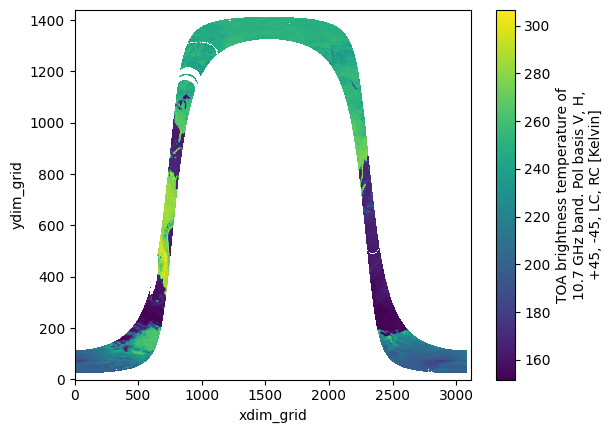

In [27]:
ds.tb_10.sel(polarization_6=0, look=0).plot()

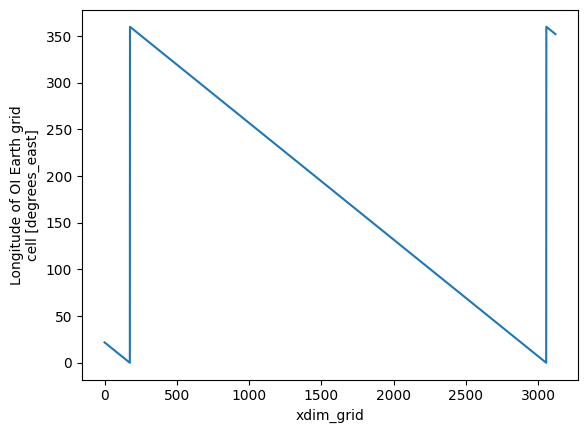

In [8]:
ds.longitude.sel(ydim_grid=0).plot()

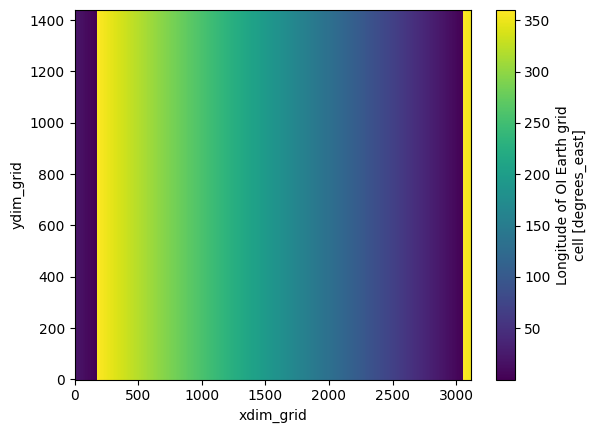

In [38]:
# Lets roll the dataset so that longitude matches with the grid start.
degrees = 0
rolledds = ds.roll(xdim_grid=degrees * 8)
rolledds.longitude.plot()

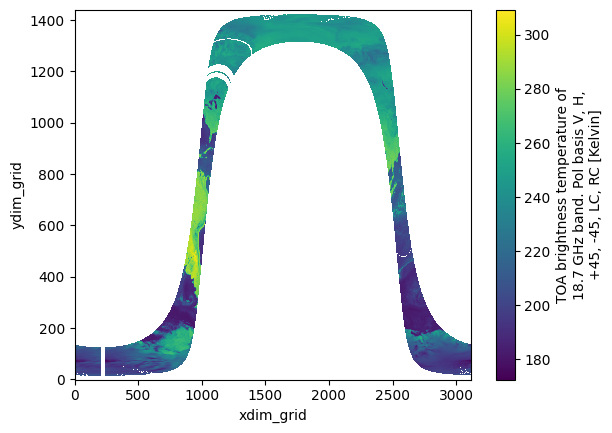

In [12]:
rolledds.tb_18.sel(polarization_6=0, look=0).plot()

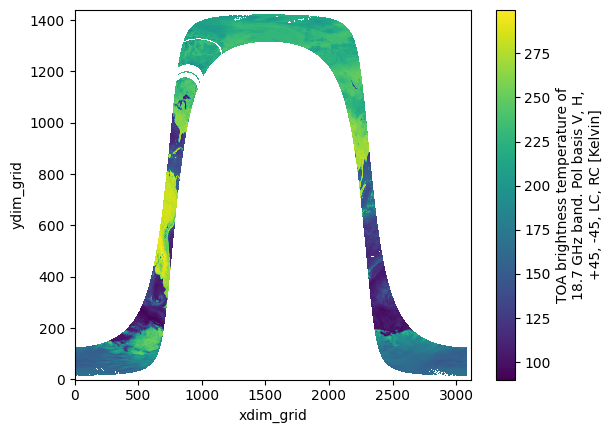

In [9]:
# Asign new coordinates to the valiables, lat and long, besides the original ydim_gird and xdim_gird

kaH = ds.tb_18.sel(polarization_6=1, look=0)
kaH.plot()

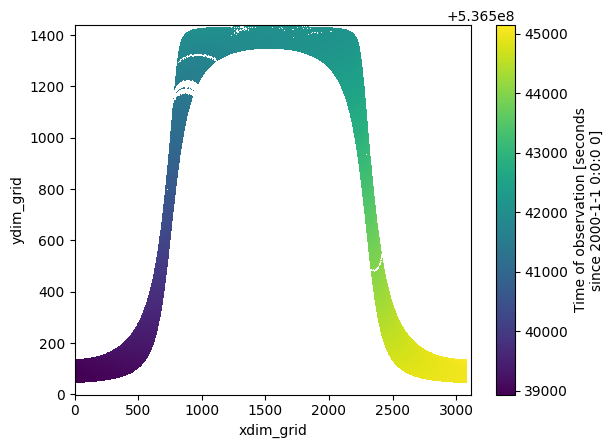

In [17]:
ds.time.sel(look=0, frequency_band=0).plot()

In [29]:
import numpy as np
import pandas as pd
import xarray as xr


def secs_to_datetime(time_array: xr.DataArray) -> xr.DataArray:
    origin_date = pd.to_datetime("2000-01-01 00:00:00")

    # Convert seconds to timedelta
    timedelta_array = np.timedelta64(1, "s") * time_array

    # Add timedelta to origin_date
    datetime_array = origin_date + timedelta_array

    return datetime_array


ds["datetime"] = secs_to_datetime(ds.time)

c:\Users\andre\Desktop\VS_Code\PMW_LST\.venv\lib\site-packages\xarray\core\computation.py:825: RuntimeWarning: invalid value encountered in multiply
  result_data = func(*input_data)
C:\Users\andre\AppData\Local\Temp\ipykernel_18704\2631884033.py:29: UserWarning: Converting non-nanosecond precision timedelta values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  timedelta_array = np.timedelta64(1, 's') * time_array


In [39]:
ds.tb_37

<xarray.DataArray 'tb_37' (polarization_6: 6, look: 2, ydim_grid: 1440,
                           xdim_grid: 3120)> Size: 216MB
[53913600 values with dtype=float32]
Dimensions without coordinates: polarization_6, look, ydim_grid, xdim_grid
Attributes:
    long_name:              TOA brightness temperature of 37.0 GHz band. Pol ...
    standard_name:          brightness_temperature
    units:                  Kelvin
    coverage_content_type:  physicalMeasurement

In [47]:
""" 
Metodology to stich together each pass data:

Crop the x-y grid so that longitude values are between 0 and 360 (tricky)

start = leftmost x value that has 0 degrees longitude

end = rightmost x value that has >360

The passes (asc and desc) start and end within that interval

The remaining  x values are part of the next pass. 
"""

kaH = ds.tb_37.sel(polarization_6=1, look=0)
longitude = ds.longitude.sel(
    ydim_grid=0
)  # Pick one value of the y grid (lat) to reduce the data size

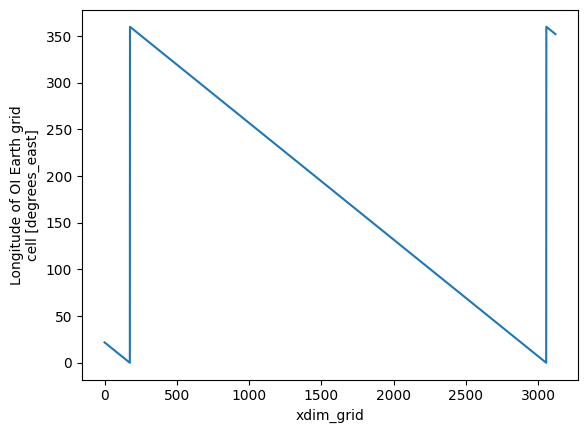

In [48]:
longitude.plot()

In [ ]:
# Split the array into past, present and future orbits


def startEndSlices(arr: xr.DataArray) -> tuple[int, int]:
    """
    helper function
        Given a data array, selec the xgrid values that separate 0-360 lattidude
    """

    return start, end

In [53]:
np.unique(longitude.where(longitude == 0).data)

array([nan], dtype=float32)